In [115]:
library(readr)
library(ggplot2)

In [116]:
cruise=read_csv('COVID-19/Cruise/Diamond_Princess_dataset_dateWise_summary.csv')
hubei=read_csv('COVID-19/Hubei/Hubei_dataset_dateWise_summary.csv')

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)

Parsed with column specification:
cols(
  State = col_character(),
  Day = col_double(),
  Date = col_character(),
  Confirmed = col_double(),
  Deaths = col_double(),
  Recovered = col_double(),
  Active.Cases = col_double(),
  Closed.Cases = col_double()
)



In [117]:
head(cruise)
head(hubei)

State,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
Diamond Princess,1,21-01-2020,0,0,0,0,0
Diamond Princess,2,22-01-2020,0,0,0,0,0
Diamond Princess,3,23-01-2020,0,0,0,0,0
Diamond Princess,4,24-01-2020,0,0,0,0,0
Diamond Princess,5,25-01-2020,0,0,0,0,0
Diamond Princess,6,26-01-2020,0,0,0,0,0


State,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
Hubei,1,21-01-2020,270,0,25,245,25
Hubei,2,22-01-2020,444,17,28,399,45
Hubei,3,23-01-2020,444,17,28,399,45
Hubei,4,24-01-2020,549,24,31,494,55
Hubei,5,25-01-2020,761,40,32,689,72
Hubei,6,26-01-2020,1058,52,42,964,94


In [118]:
colnames(cruise)
colnames(wuhan)

[1] "State"        "Day"          "Date"         "Confirmed"    "Deaths"      
[6] "Recovered"    "Active.Cases" "Closed.Cases"

[1] "Day"       "Confirmed"

In [119]:
cruise=cruise[,c('Day','Confirmed')]
hubei=hubei[,c('Day','Confirmed')]

In [120]:
percent_affected <- function(val){
    return((val*100)/Total)
}

In [121]:
Total = 3711
cruise$'percent_affected' = apply(cruise[,'Confirmed'],1,percent_affected)

In [122]:
tail(cruise)

Day,Confirmed,percent_affected
43,706,19.02452
44,706,19.02452
45,706,19.02452
46,696,18.75505
47,696,18.75505
48,696,18.75505


In [123]:
Total = 60057550
hubei$'percent_affected' = apply(hubei[,'Confirmed'],1,percent_affected)

In [112]:
tail(hubei)

Day,Confirmed,percent_affected
43,67217,0.1119210
44,67332,0.1121125
45,67466,0.1123356
46,67592,0.1125454
47,67666,0.1126686
48,67707,0.1127369


ERROR: Error in plot(x = ceuise$Day, y = cruise$percent_affected, xlab = "Day", : object 'ceuise' not found


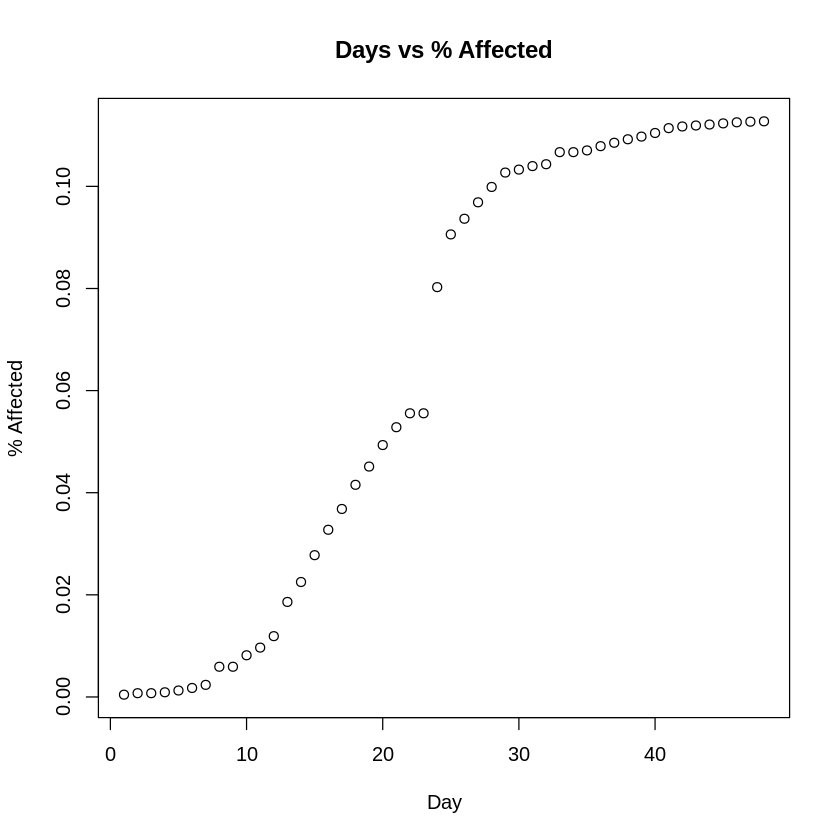

In [113]:
hubei.scatter.plot <- ggplot(hubei, aes(x = hubei$Day,y = hubei$percent_affected)) +
                        geom_points(color=black) 
   xlab = "Day",
   ylab = "% Affected",
)

cruise.scatter.plot <- plot(x = ceuise$Day,y = cruise$percent_affected,
   xlab = "Day",
   ylab = "% Affected",
   main = "Days vs % Affected"
)